In [22]:
import FinanceDataReader as fdr
from pykrx import stock
import pandas_datareader.data as pdr
import yfinance as yf

In [34]:
from pykrx import stock
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr

# 시작일과 종료일 설정
start_date = "2000-01-01"
end_date = "2024-10-31"

# pykrx로 상장된 종목코드와 이름 가져오기
tickers = stock.get_market_ticker_list(market="KOSPI")
ticker_info = {ticker: stock.get_market_ticker_name(ticker) for ticker in tickers}

# 데이터프레임 초기화
stock_data_list = []

# 각 종목의 주식 데이터 가져오기 (pykrx 사용)
for ticker, name in ticker_info.items():
    try:
        # 특정 종목의 주식 데이터 가져오기
        df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
        
        # 필요한 정보 추출 (시가, 고가, 저가, 종가, 거래량)
        df_krx = df_krx[['시가', '고가', '저가', '종가', '거래량']].reset_index()
        df_krx['ticker'] = ticker
        df_krx['name'] = name
        df_krx.rename(columns={'시가': 'open', '고가': 'high', '저가': 'low', '종가': 'close', '거래량': 'volume', '날짜': 'date'}, inplace=True)

        # 결과를 리스트에 추가
        stock_data_list.append(df_krx)

    except Exception as e:
        print(f"Error retrieving data for ticker {ticker}: {e}")

# 모든 데이터를 하나의 데이터프레임으로 결합
if stock_data_list:
    df_stock_data = pd.concat(stock_data_list, ignore_index=True)
else:
    df_stock_data = pd.DataFrame(columns=['date', 'ticker', 'name', 'open', 'high', 'low', 'close', 'volume'])

# 고유 종목 코드와 종목명만 확인
unique_stocks = df_stock_data[['ticker', 'name']].drop_duplicates().reset_index(drop=True)

# 종목 코드와 이름 간략 조회
print("코스피 종목 코드 및 이름 조회:")
print(unique_stocks)

# 데이터프레임의 간단한 요약 정보 확인
df_summary = df_stock_data.describe(include='all')
print("\n데이터프레임 요약 정보:")
print(df_summary)

# 코스피 지수 데이터를 가져와 데이터프레임으로 저장
kospi_index = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")[['종가']].dropna()
# 인덱스 초기화를 하지 않고 유지합니다 (시계열 분석을 위해 날짜 인덱스 유지)
print("\n코스피 지수 종가 데이터:")
print(kospi_index)



코스피 종목 코드 및 이름 조회:
     ticker     name
0    095570   AJ네트웍스
1    006840    AK홀딩스
2    027410      BGF
3    282330   BGF리테일
4    138930  BNK금융지주
..      ...      ...
953  079980      휴비스
954  005010      휴스틸
955  000540     흥국화재
956  000545    흥국화재우
957  003280     흥아해운

[958 rows x 2 columns]


C:\TempFolder\ipykernel_41452\3890715763.py:49: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_summary = df_stock_data.describe(include='all')



데이터프레임 요약 정보:
                       date          open          high           low  \
count               4564016  4.564016e+06  4.564016e+06  4.564016e+06   
unique                 6126           NaN           NaN           NaN   
top     2024-10-07 00:00:00           NaN           NaN           NaN   
freq                    958           NaN           NaN           NaN   
first   2000-01-04 00:00:00           NaN           NaN           NaN   
last    2024-10-31 00:00:00           NaN           NaN           NaN   
mean                    NaN  7.159158e+04  7.388755e+04  6.943448e+04   
std                     NaN  2.192024e+06  2.278575e+06  2.109044e+06   
min                     NaN  0.000000e+00  0.000000e+00  0.000000e+00   
25%                     NaN  2.920000e+03  2.980000e+03  2.860000e+03   
50%                     NaN  8.300000e+03  8.460000e+03  8.145000e+03   
75%                     NaN  2.820000e+04  2.875000e+04  2.770000e+04   
max                     NaN  5.71596

In [46]:
unique_stocks = df_stock_data[['ticker', 'name']].drop_duplicates().reset_index(drop=True)

print("코스피 종목 코드 및 이름 조회:")
print(unique_stocks)

df_summary = df_stock_data.describe(include='all')
print("\n데이터프레임 요약 정보:")
print(df_summary)



# 종목 코드와 이름을 txt 파일로 내보내기
unique_stocks.to_csv('kospi_ticker_names.txt', sep='	', index=False, header=True)

코스피 종목 코드 및 이름 조회:
     ticker     name
0    095570   AJ네트웍스
1    006840    AK홀딩스
2    027410      BGF
3    282330   BGF리테일
4    138930  BNK금융지주
..      ...      ...
953  079980      휴비스
954  005010      휴스틸
955  000540     흥국화재
956  000545    흥국화재우
957  003280     흥아해운

[958 rows x 2 columns]


C:\TempFolder\ipykernel_41452\3071487234.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_summary = df_stock_data.describe(include='all')



데이터프레임 요약 정보:
                       date          open          high           low  \
count               4564016  4.564016e+06  4.564016e+06  4.564016e+06   
unique                 6126           NaN           NaN           NaN   
top     2024-10-07 00:00:00           NaN           NaN           NaN   
freq                    958           NaN           NaN           NaN   
first   2000-01-04 00:00:00           NaN           NaN           NaN   
last    2024-10-31 00:00:00           NaN           NaN           NaN   
mean                    NaN  7.159158e+04  7.388755e+04  6.943448e+04   
std                     NaN  2.192024e+06  2.278575e+06  2.109044e+06   
min                     NaN  0.000000e+00  0.000000e+00  0.000000e+00   
25%                     NaN  2.920000e+03  2.980000e+03  2.860000e+03   
50%                     NaN  8.300000e+03  8.460000e+03  8.145000e+03   
75%                     NaN  2.820000e+04  2.875000e+04  2.770000e+04   
max                     NaN  5.71596

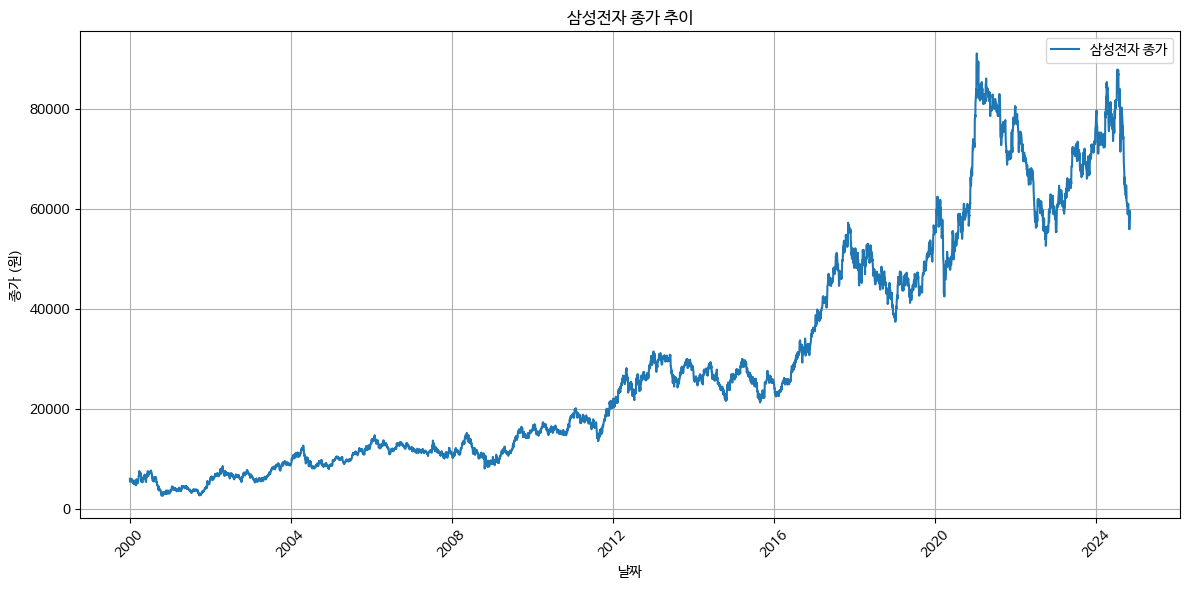

In [33]:
import matplotlib.pyplot as plt

# 삼성전자 종목 코드 (005930)
ticker = '005930'
name = '삼성전자'

# 특정 종목의 주식 데이터 가져오기 (pykrx 사용)
try:
    df_krx = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    
    # 필요한 정보만 추출
    df_krx = df_krx[['종가']].reset_index()
    df_krx['ticker'] = ticker
    df_krx['name'] = name
    df_krx.rename(columns={'종가': 'close', '날짜': 'date'}, inplace=True)

    # 그래프로 출력
    plt.figure(figsize=(12, 6))
    plt.plot(df_krx['date'], df_krx['close'], label='삼성전자 종가')
    plt.title('삼성전자 종가 추이')
    plt.xlabel('날짜')
    plt.ylabel('종가 (원)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

except Exception as e:
    print(f"Error retrieving data for ticker {ticker}: {e}")

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 특정 종목 선택 (예: 삼성전자)
ticker_to_use = "005930"  # 삼성전자의 종목 코드
df_specific = df_stock_data[df_stock_data['ticker'] == ticker_to_use].copy()

# 날짜 순서로 정렬
df_specific.sort_values(by='date', inplace=True)

# 주요 지표 계산 (RSI, 이동평균선, MACD)
# RSI 계산
window_length = 14
delta = df_specific['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()
rs = avg_gain / avg_loss
df_specific['RSI'] = 100 - (100 / (1 + rs))

# 이동평균선 계산
# 20일 단순 이동평균선 (SMA)
df_specific['SMA_20'] = df_specific['close'].rolling(window=20).mean()
# 50일 단순 이동평균선 (SMA)
df_specific['SMA_50'] = df_specific['close'].rolling(window=50).mean()

# MACD 계산
ema_short = df_specific['close'].ewm(span=12, adjust=False).mean()
ema_long = df_specific['close'].ewm(span=26, adjust=False).mean()
df_specific['MACD'] = ema_short - ema_long
df_specific['MACD_signal'] = df_specific['MACD'].ewm(span=9, adjust=False).mean()

# 결과 확인
print("\n삼성전자 주요 지표 포함 데이터:")
print(df_specific.tail())



삼성전자 주요 지표 포함 데이터:
              date   open   high    low  close    volume  ticker  name  \
2154669 2024-10-25  56000  56900  55800  55900  25829315  005930  삼성전자   
2154670 2024-10-28  55700  58500  55700  58100  27775009  005930  삼성전자   
2154671 2024-10-29  58000  59600  57300  59600  28369314  005930  삼성전자   
2154672 2024-10-30  59100  59800  58600  59100  19838511  005930  삼성전자   
2154673 2024-10-31  58500  61200  58300  59200  35809196  005930  삼성전자   

               RSI   SMA_20   SMA_50         MACD  MACD_signal  
2154669  31.782946  60125.0  67274.0 -2769.747446 -2859.004907  
2154670  40.136054  59920.0  66968.0 -2622.439567 -2811.691839  
2154671  47.741935  59665.0  66666.0 -2357.483939 -2720.850259  
2154672  50.684932  59410.0  66338.0 -2162.917748 -2609.263757  
2154673  49.650350  59295.0  66000.0 -1977.854005 -2482.981806  


In [39]:
# 벤치마크(KOSPI) 데이터 불러오기
kospi_index = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")[['종가']].rename(columns={'종가': 'kospi_close'})

# 특정 종목의 벤치마크 대비 초과 수익률 계산
df_specific = df_specific.merge(kospi_index, left_on='date', right_index=True, how='left')
df_specific['stock_return'] = df_specific['close'].pct_change(periods=30)  # 30일 수익률
df_specific['kospi_return'] = df_specific['kospi_close'].pct_change(periods=30)
df_specific['label_benchmark'] = (df_specific['stock_return'] > df_specific['kospi_return']).astype(int)  # 고평가: 1, 저평가: 0

# 과거 30일 평균 주가 대비 현재 위치 기준 레이블링
df_specific['avg_30'] = df_specific['close'].rolling(window=30).mean()
df_specific['label_avg'] = (df_specific['close'] > df_specific['avg_30'] * 1.2).astype(int)  # 고평가: 1, 저평가: 0

# 결과 확인
print("\n레이블링 완료 데이터:")
print(df_specific[['date', 'close', 'stock_return', 'kospi_return', 'label_benchmark', 'label_avg']].tail())



레이블링 완료 데이터:
              date  close  stock_return  kospi_return  label_benchmark  \
2154669 2024-10-25  55900     -0.189855      0.003017                0   
2154670 2024-10-28  58100     -0.156749      0.026786                0   
2154671 2024-10-29  59600     -0.117037      0.032284                0   
2154672 2024-10-30  59100     -0.107251      0.027883                0   
2154673 2024-10-31  59200     -0.087827      0.017021                0   

         label_avg  
2154669          0  
2154670          0  
2154671          0  
2154672          0  
2154673          0  


In [41]:
# 학습에 사용할 주요 지표 선택
features = ['RSI', 'SMA_20', 'SMA_50', 'MACD']
X = df_specific[features]
y = df_specific['label_avg']  # 'label_avg' 또는 'label_benchmark' 선택 가능

# X와 y에서 동시에 결측값이 있는 행 제거
df_combined = pd.concat([X, y], axis=1).dropna()
X = df_combined[features]
y = df_combined['label_avg']

# 8개월 훈련, 4개월 테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

print("\n훈련 및 테스트 데이터 준비 완료:")
print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")



훈련 및 테스트 데이터 준비 완료:
훈련 데이터 크기: (4071, 4), 테스트 데이터 크기: (2006, 4)



모델 평가 결과:
Accuracy: 0.9995014955134596
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2005
           1       0.00      0.00      0.00         1

    accuracy                           1.00      2006
   macro avg       0.50      0.50      0.50      2006
weighted avg       1.00      1.00      1.00      2006



C:\Users\saty1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saty1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saty1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


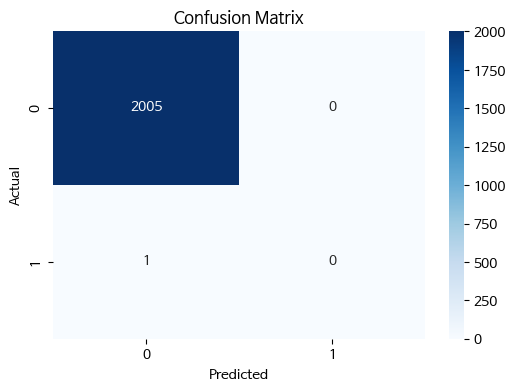

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("\n모델 평가 결과:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


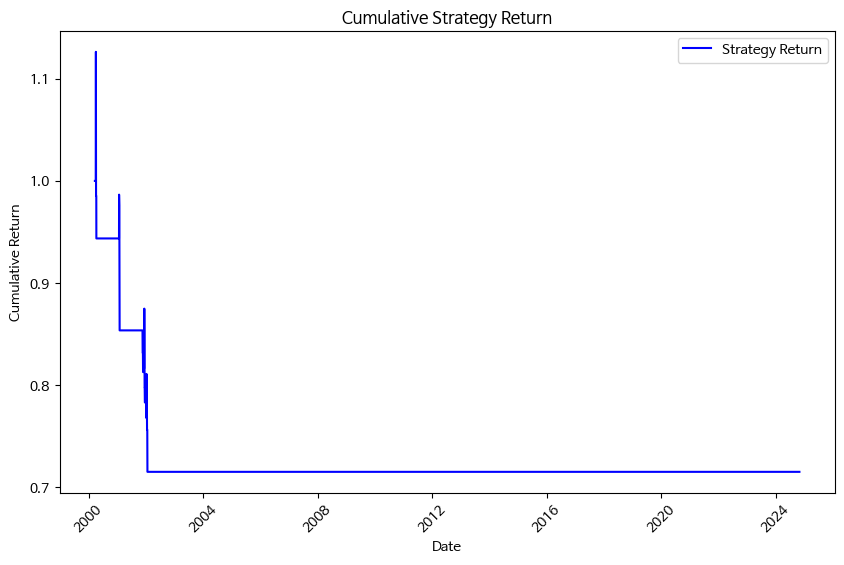

In [43]:
# 가상 투자 성과 백테스팅 (간단한 예시)
df_specific['pred'] = pd.Series(model.predict(X), index=X.index)
df_specific['strategy'] = df_specific['pred'].shift(1)  # 하루 늦춰서 거래했다고 가정
df_specific['daily_return'] = df_specific['close'].pct_change()

# 모델 기반 전략 수익률 계산
df_specific['strategy_return'] = df_specific['strategy'] * df_specific['daily_return']
cumulative_strategy_return = (1 + df_specific['strategy_return']).cumprod()

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_specific['date'], cumulative_strategy_return, label='Strategy Return', color='blue')
plt.title('Cumulative Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.xticks(rotation=45)
plt.show()


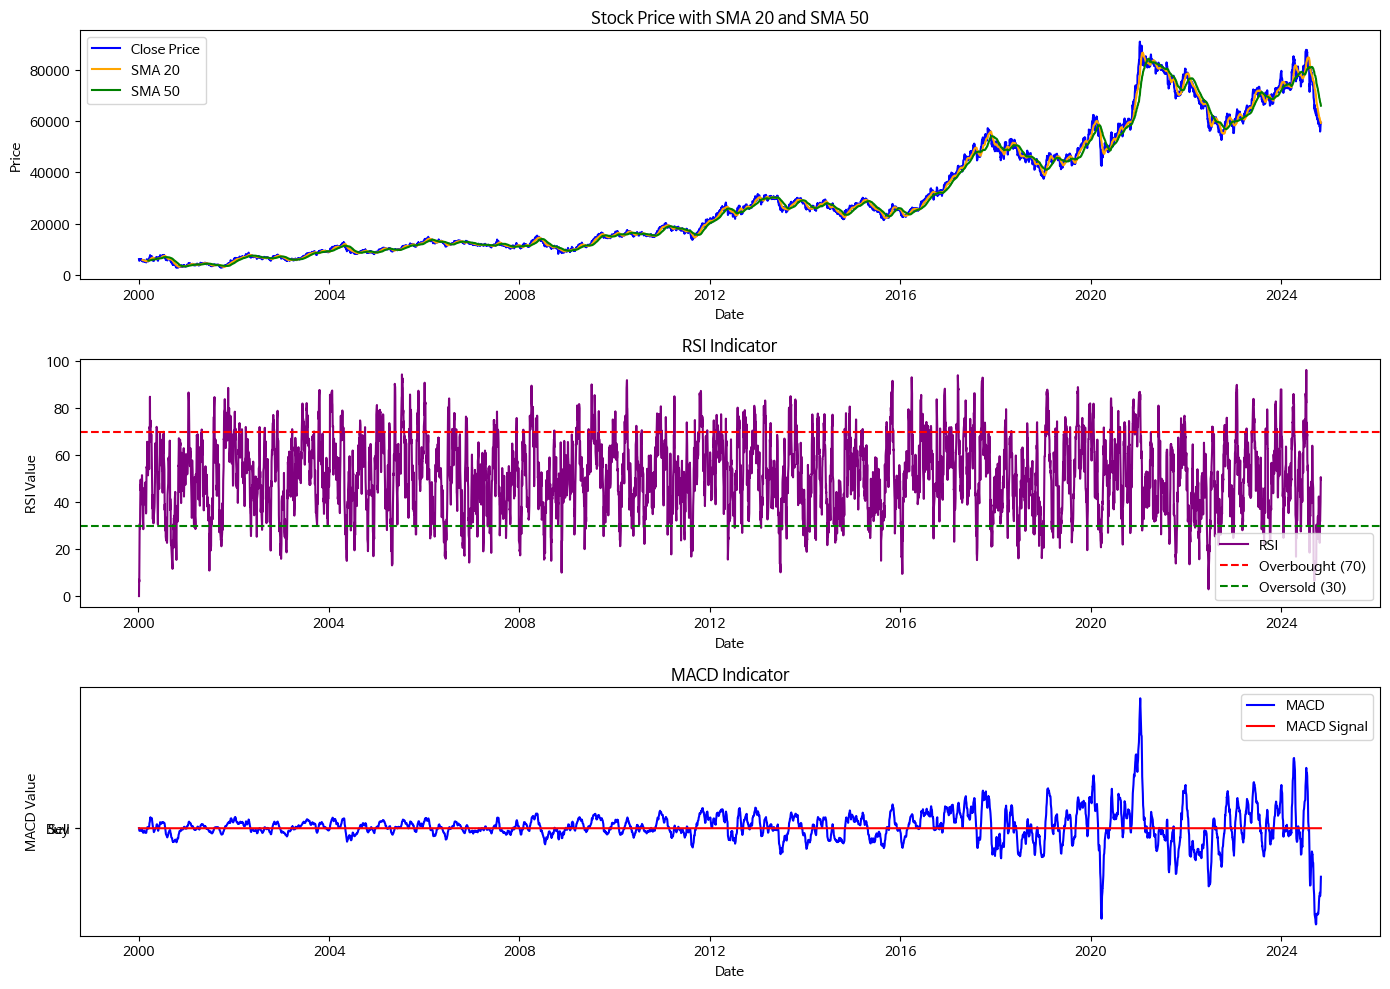


삼성전자 주요 지표별 신호:
              date        RSI RSI_signal   SMA_20   SMA_50 SMA_signal  \
2154669 2024-10-25  31.782946    Neutral  60125.0  67274.0       Sell   
2154670 2024-10-28  40.136054    Neutral  59920.0  66968.0       Sell   
2154671 2024-10-29  47.741935    Neutral  59665.0  66666.0       Sell   
2154672 2024-10-30  50.684932    Neutral  59410.0  66338.0       Sell   
2154673 2024-10-31  49.650350    Neutral  59295.0  66000.0       Sell   

                MACD MACD_signal  
2154669 -2769.747446         Buy  
2154670 -2622.439567         Buy  
2154671 -2357.483939         Buy  
2154672 -2162.917748         Buy  
2154673 -1977.854005         Buy  


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 특정 종목 선택 (예: 삼성전자)
ticker_to_use = "005930"  # 삼성전자의 종목 코드
df_specific = df_stock_data[df_stock_data['ticker'] == ticker_to_use].copy()

# 날짜 순서로 정렬
df_specific.sort_values(by='date', inplace=True)

# 주요 지표 계산 (RSI, 이동평균선, MACD)
# RSI 계산
window_length = 14
delta = df_specific['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()
rs = avg_gain / avg_loss
df_specific['RSI'] = 100 - (100 / (1 + rs))

# 이동평균선 계산
# 20일 단순 이동평균선 (SMA)
df_specific['SMA_20'] = df_specific['close'].rolling(window=20).mean()
# 50일 단순 이동평균선 (SMA)
df_specific['SMA_50'] = df_specific['close'].rolling(window=50).mean()

# MACD 계산
ema_short = df_specific['close'].ewm(span=12, adjust=False).mean()
ema_long = df_specific['close'].ewm(span=26, adjust=False).mean()
df_specific['MACD'] = ema_short - ema_long
df_specific['MACD_signal'] = df_specific['MACD'].ewm(span=9, adjust=False).mean()

# 고/저평가 판단
df_specific['RSI_signal'] = np.where(df_specific['RSI'] > 70, 'Overbought', np.where(df_specific['RSI'] < 30, 'Oversold', 'Neutral'))
df_specific['SMA_signal'] = np.where(df_specific['SMA_20'] > df_specific['SMA_50'], 'Buy', 'Sell')
df_specific['MACD_signal'] = np.where(df_specific['MACD'] > df_specific['MACD_signal'], 'Buy', 'Sell')

# 시각적 효과 추가
plt.figure(figsize=(14, 10))

# 1. 종가와 이동평균선 그래프
plt.subplot(3, 1, 1)
plt.plot(df_specific['date'], df_specific['close'], label='Close Price', color='blue')
plt.plot(df_specific['date'], df_specific['SMA_20'], label='SMA 20', color='orange')
plt.plot(df_specific['date'], df_specific['SMA_50'], label='SMA 50', color='green')
plt.title('Stock Price with SMA 20 and SMA 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 2. RSI 그래프
plt.subplot(3, 1, 2)
plt.plot(df_specific['date'], df_specific['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()

# 3. MACD 그래프
plt.subplot(3, 1, 3)
plt.plot(df_specific['date'], df_specific['MACD'], label='MACD', color='blue')
plt.plot(df_specific['date'], df_specific['MACD_signal'], label='MACD Signal', color='red')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()

plt.tight_layout()
plt.show()

# 주요 지표별 고/저평가 신호 확인
print("\n삼성전자 주요 지표별 신호:")
print(df_specific[['date', 'RSI', 'RSI_signal', 'SMA_20', 'SMA_50', 'SMA_signal', 'MACD', 'MACD_signal']].tail())
